# Travelling Salesman

We will use the QuickGA library to compute hueristic solutions to the [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem).


In [1]:
import math
import random
from matplotlib import pyplot as plt
from quickga import Organism, PermutationSequenceTrait

random.seed(0)
NUMPOINTS = 20

First we need to generate the set of points for which we want to find the shortest connecting path

We also define a function that can take a list of indices and graph a path depending on the order of the indices

In [2]:
def generate_points(num_points):
    return [(random.randint(0,100), random.randint(0,100)) for i in range(num_points)]

points = generate_points(NUMPOINTS)

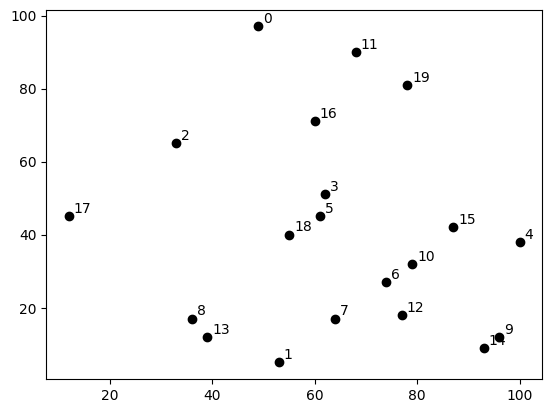

In [3]:
def plot_points(points):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    plt.plot(xs, ys, 'ok')
    for i in range(len(points)):
        plt.text(xs[i]+1, ys[i]+1, i)

plot_points(points)

Now we write a method to plot a path between points given their order in a list. Then for example, the path of visiting each point in ascending order

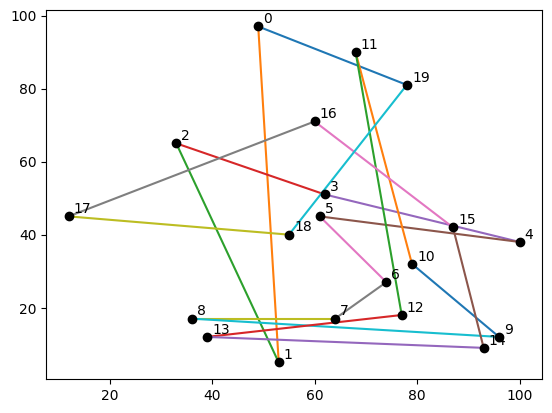

In [4]:
def plot_line_segment(a, b, style=''):
    plt.plot([a[0], b[0]], [a[1], b[1]], style)

def plot_path(sequence, style=''):
    for i in range(len(sequence)):
        plot_line_segment(points[sequence[i]], points[sequence[i-1]], style)
    plot_points(points)

plot_path(range(NUMPOINTS))

Next we define our "Organism"

We only need it to have one trait: A permutation of the indices for our points. For this, we will generate all indices [0,1,...,n] for n points, and create a new PermutationSequenceTrait. This is a trait can handle the crossing over and mutation of lists which represent permutations of a set, in our case the indices of points visited.

We must also define a way to evaulate each "Organism": For this we will simply calculate the total distance from point to point in a loop. However, because we want a higher value to represent a better solution, we will take the inverse of this value.

In [5]:
class TravelingSalesman(Organism):
    def __init__(self):
        super().__init__()
        indices = [i for i in range(len(points))]
        self.add_trait('sequence', PermutationSequenceTrait(indices, mutation_type='inversion'))

    def evaluate(self):
        total_distance = 0
        distance = lambda a, b: math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
        ordered_points = [points[i] for i in self.sequence]
        for i in range(len(ordered_points)):
            total_distance += distance(ordered_points[i], ordered_points[i-1])
        return 1/total_distance

Now all we need to do is evolve the "Organism" on the set of points defined above.

We will use a population size of 100 per generation and run for 1000 generations. We will keep the top 5% of solutions and pass directly to next generation. We will also introduce new solutions to the parent pool each generation. The number of new solutions will be 20% of the generation size, meaning in our case we will introduce 1000 * 0.2 = 200 new solutions to the parent pool each generation

In [6]:
info = TravelingSalesman.evolve(population_size=100, generations=1000, elite_rate=0.05, migration_rate=0.2)

And finally we will take the best solution and graph the best solution.

The most efficient path is: 

[3, 16, 19, 11, 0, 2, 17, 8, 13, 1, 7, 12, 14, 9, 4, 15, 10, 6, 18, 5]


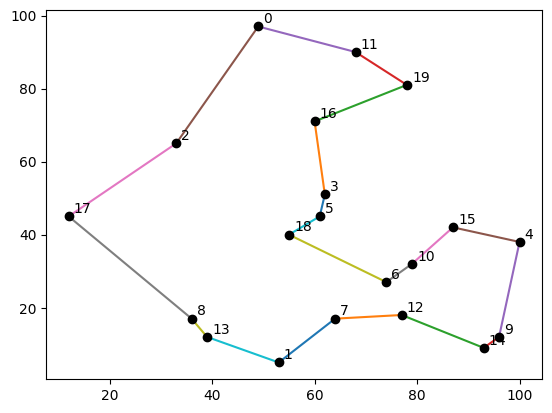

In [7]:
sequence = info[-1]['most_fit'].sequence
print(f"The most efficient path is: \n\n{sequence}")
plot_path(sequence)

We can also graph the total distance of the path for the best solution in each generation

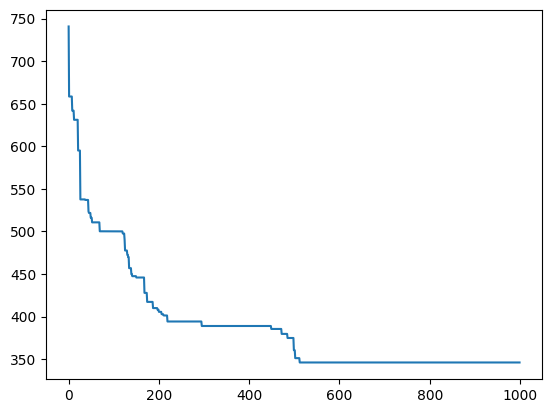

In [8]:
plt.plot([1/gen['max_fitness'] for gen in info])